**<h1 style="color:yellow">Is the salary more or less than 50K?</h1>**
Ref Link: https://www.kaggle.com/uciml/adult-census-income
1. Explore the data
2. The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc..

**<h2 style="color:cyan">Import libraries</h2>**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**<h2 style="color:white">Read the data</h2>**


In [2]:
df = pd.read_csv('adult.csv')
df_original = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**<h2 style="color:green">Data Cleaning</h2>**


In [3]:
df = df.replace("?", np.nan)
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df = df.dropna(axis=0, how='any')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


**<h2 style="color:orange">Visualization</h2>**


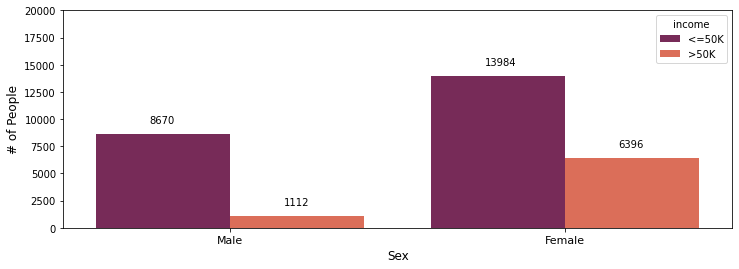

In [5]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'sex', hue="income", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of People", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


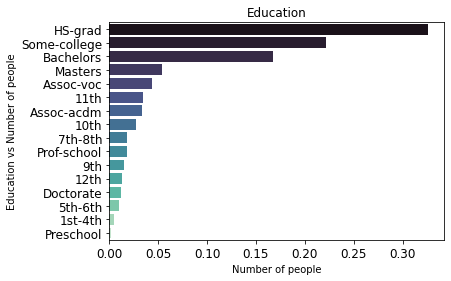

In [6]:
edu = df["education"].value_counts(normalize=True)

sns.barplot(edu.values, edu.index, palette='mako')
plt.title('Education')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


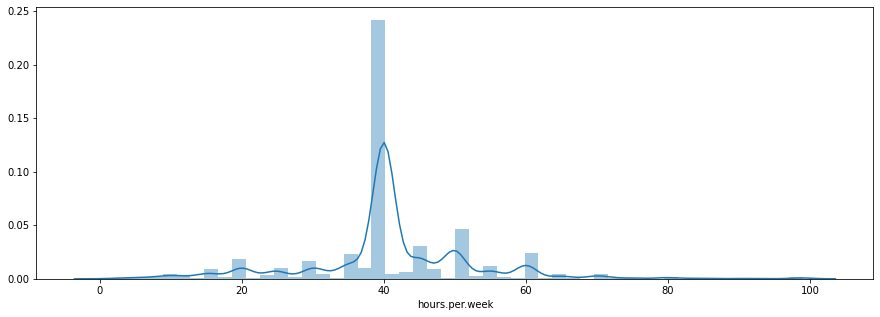

In [7]:
plt.figure(figsize=(15,5))

sns.distplot(df['hours.per.week'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

**<h2 style="color:brown">Data Encoding</h2>**


In [8]:
dummies = pd.get_dummies(df.income)
dummies

,<=50K,>50K
1,1,0
3,1,0
4,1,0
5,1,0
6,1,0
...,...,...
32556,1,0
32557,1,0
32558,0,1
32559,1,0


In [9]:
merged = pd.concat([df,dummies], axis='columns') # to add prefix: ..., prefix=["Quarter_"] )
merged

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,<=50K,>50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,1,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,1,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,1,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,1,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,1,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,1,0


In [10]:
final_data = merged.drop(['income'],axis='columns')
final_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,<=50K,>50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,1,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,1,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,1,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,1,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,1,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1,0


<h2 style="color:yellow">Splitting the data</h2>


In [11]:
final = final_data.drop(['<=50K'], axis='columns')
final 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,>50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [12]:
final = final.drop(["fnlwgt","education","marital.status","relationship","capital.loss","native.country"],axis=1)
final

,age,workclass,education.num,occupation,race,sex,capital.gain,hours.per.week,>50K
1,82,Private,9,Exec-managerial,White,Female,0,18,0
3,54,Private,4,Machine-op-inspct,White,Female,0,40,0
4,41,Private,10,Prof-specialty,White,Female,0,40,0
5,34,Private,9,Other-service,White,Female,0,45,0
6,38,Private,6,Adm-clerical,White,Male,0,40,0
...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Protective-serv,White,Male,0,40,0
32557,27,Private,12,Tech-support,White,Female,0,38,0
32558,40,Private,9,Machine-op-inspct,White,Male,0,40,1
32559,58,Private,9,Adm-clerical,White,Female,0,40,0


**<h2 style="color:brown">Label Encoding</h2>**


In [13]:
from sklearn.preprocessing import LabelEncoder
le_workclass = LabelEncoder()
le_race = LabelEncoder()
le_sex = LabelEncoder()
le_occupation = LabelEncoder()

In [14]:
# Create three columns in the input data frame
final['workclass'] = le_workclass.fit_transform(final['workclass'])
final['race'] = le_race.fit_transform(final['race'])
final['sex'] = le_sex.fit_transform(final['sex'])
final['occupation'] = le_sex.fit_transform(final['occupation'])
final

,age,workclass,education.num,occupation,race,sex,capital.gain,hours.per.week,>50K
1,82,2,9,3,4,0,0,18,0
3,54,2,4,6,4,0,0,40,0
4,41,2,10,9,4,0,0,40,0
5,34,2,9,7,4,0,0,45,0
6,38,2,6,0,4,1,0,40,0
...,...,...,...,...,...,...,...,...,...
32556,22,2,10,10,4,1,0,40,0
32557,27,2,12,12,4,0,0,38,0
32558,40,2,9,6,4,1,0,40,1
32559,58,2,9,0,4,0,0,40,0


<h2 style="color:yellow">Defining X (input) and y (target)</h2>

In [15]:
X = final.drop([">50K"], axis = "columns")
X.head()

,age,workclass,education.num,occupation,race,sex,capital.gain,hours.per.week
1,82,2,9,3,4,0,0,18
3,54,2,4,6,4,0,0,40
4,41,2,10,9,4,0,0,40
5,34,2,9,7,4,0,0,45
6,38,2,6,0,4,1,0,40


In [16]:
target = final['>50K']
y = target

In [17]:
y.head()

1    0
3    0
4    0
5    0
6    0
Name: >50K, dtype: uint8

**<h2 style="color:blue">Train the Model</h2>**


In [18]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [19]:
model.fit(X,y)

DecisionTreeClassifier()

**<h2 style="color:gray">Model Evaluation</h2>**


In [20]:
model.score(X, y)

0.9523572707380147

**<h2 style="color:purple">Make prediction</h2>**


In [21]:
model.predict([[41, 2, 10, 9, 4, 0, 0, 40]])

C:\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)